Radial Schrodinger equation is:

\begin{align}
\frac{\hbar^2}{2m} ( \frac{d^2u(r)}{dr^2}) = [V(r) + \frac{l(l+1)\hbar^2}{2mr^2}]u(r) - Eu(r) \\
&du/dr = v  \\
\frac{dv(r)}{dr} = \frac{2m}{\hbar^2} [V(r) + \frac{l(l+1)\hbar^2}{2mr^2} - E]u(r) \\
\Psi(r) = u(r)/r 
\end{align}

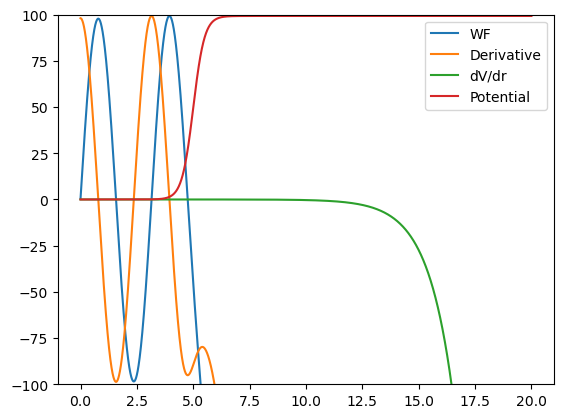

In [14]:
import numpy as np
import matplotlib.pyplot as plt

rmin = 0
rmax = 20
rsteps = 10000
dr = (rmax-rmin)/rsteps
v = 0.01
u = 0
E = 82.753
m = 1*931.5
hbar2 = 197**2 
diffuse = 2

def V(r):
    return 0.6*E*(1+np.tanh((r-5)*diffuse))

rarray = np.linspace(rmin,rmax,rsteps)
usol = []
vsol = []
dvsol = []
for r in rarray:
    vnew = v + (((2.*m)/(hbar2))*(V(r)-E))*u*dr
    #print(V(r),vnew,(((2.*m)/(hbar2))*(V(r)-E)*u)*dr)
    unew = u + dr*v
    v, u = vnew, unew
    usol.append(unew)
    vsol.append(vnew)
    dvsol.append((((2.*m)/(hbar2))*(V(r)-E)*u))
plt.plot(rarray,np.max(V(rarray))*np.array(usol)/np.max(usol),label='WF')
plt.plot(rarray,np.max(V(rarray))*np.array(vsol)/np.max(vsol),label='Derivative')
plt.plot(rarray,dvsol,label='dV/dr')
plt.plot(rarray,V(rarray),label='Potential')
#plt.yscale('log')
plt.ylim([-100,100])
plt.legend()
plt.show()


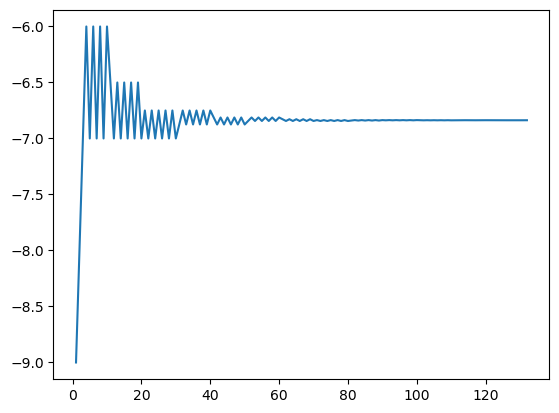

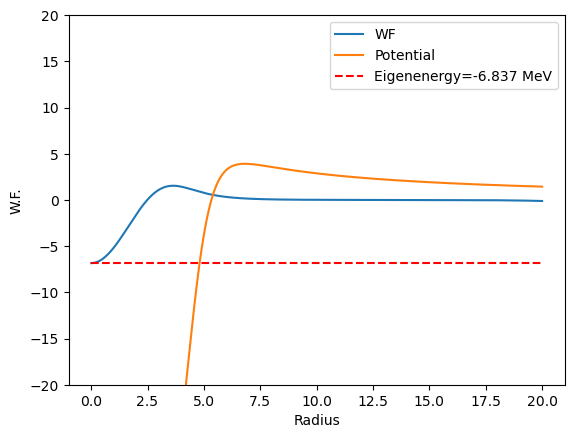

In [64]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

rmin = 0
rmax = 20
rsteps = 10000
dr = (rmax-rmin)/rsteps
v = 1
u = 0
E = -10
rarray = np.linspace(rmin,rmax,rsteps)
amu = 931.5 
hbar2 = 197**2 
diffuse = 0.5

alpha = 1./137. #fine structure constant (e^2/(4pieps_0 hbarc))
hbarc = 197 #MeV.fm
a = 0.5 #fm



Z1 = 20 #Core Z
Z2 = 1 #Nucleus feeling potential
m = 1*amu #Mass of nucleon feeling potential

A = 40
amu = 931.5 #MeV
R0 = 1.25*A**(1/3) #fm
V0 = 50 #MeV
L = 0


def Vc(r,R,Z1,Z2):#r, sphere radius, Z
    #inside = ((Z1*Z2*hbarc*alpha)/R)*(1.5-0.5*(r/R)**2)*(r<R)
    #outside = (r>=R)*((Z1*Z2*hbarc*alpha)/r)
    #return (inside+outside)
    return np.where(r>=R,((Z1*Z2*hbarc*alpha)/(r+1e-10)),((Z1*Z2*hbarc*alpha)/R)*(1.5-0.5*(r/R)**2))

def VWS(V0,r,R,a):#r, R, a
    return -V0/(1+np.exp((r-R)/a))

def V(r):
    #return 0.7*E*(1+np.tanh((r-5)*diffuse))
    return Vc(r,R0,Z1,Z2)+VWS(50,r,R0,diffuse)


def model(z,r): #(x) u is z[0] and y is v z[1]
    u = z[0]
    v = z[1]
    dvdr = (((2.*m)/(hbar2))*(V(r)-E))*u
    dudr = v #dv/dr
    dzdr = [dudr,dvdr]
    return dzdr

rlast = 0
run = True
Estep = 1
counter = 0
counts = []
Energyvals = []
while run:
    if (counter>0):
        rlast = z[:,0][-1]
    if rlast>0:
        #decrease E
        E -= Estep
    else:
        #increase E
        E += Estep
    if abs(rlast)<0.1 and counter>0:
        run = False
    if counter>1000:#Fails
        print("FAILED")
        run = False
    #print(E,rlast)
    counter += 1
    if counter % 10 == 0:
        Estep *= 0.5
    # initial condition
    z0 = [u,v] #
    # time points
    r = np.linspace(rmin,rmax,rsteps)

    # solve ODE
    z = odeint(model,z0,r)
    counts.append(counter)
    Energyvals.append(E)
    
plt.plot(counts,Energyvals)
plt.show()

#rarray = rarray[1:-1]


WF = np.array(z[:,0])
#Strip off r=0
WF = WF[1:,]
rarray = rarray[1:,]

WF = WF/np.array(rarray) #convert U(r) to wavefunction

WF = E*WF/np.max(np.abs(WF)) #scale to E

# plot results
plt.plot(rarray,WF,label='WF')
#plt.plot(r,z[:,1])
plt.ylabel('W.F.')
plt.xlabel('Radius')
plt.plot(rarray,V(rarray),label='Potential')
plt.hlines(E,rmin,rmax,label=f'Eigenenergy={E:.4} MeV',linestyle='dashed',color='r')
plt.ylim([-20,20])
plt.legend()
plt.show()